REF : https://github.com/ryuichiueda/probrobo_practice/blob/master/state_equations/no_noise.ipynb

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

from matplotlib import animation
from IPython.display import HTML

In [2]:
X0 = np.array([0, 0, 0])
u = np.array([0.1, np.deg2rad(30)])

def f(x_old, u):
    pos_x, pos_y, pos_th = x_old
    l, omega = u
    pos_x += l * math.cos(pos_th)
    pos_y += l * math.sin(pos_th)
    pos_th += omega
    return np.array([pos_x, pos_y, pos_th])

In [3]:
print(X0)

[0 0 0]


In [4]:
X1 = f(X0,u)
print(X1)

[ 0.1         0.          0.52359878]


In [5]:
X2 = f(X1,u)
print(X2)

[ 0.18660254  0.05        1.04719755]


[array([0, 0, 0]), array([ 0.1       ,  0.        ,  0.52359878]), array([ 0.18660254,  0.05      ,  1.04719755]), array([ 0.23660254,  0.13660254,  1.57079633]), array([ 0.23660254,  0.23660254,  2.0943951 ]), array([ 0.18660254,  0.32320508,  2.61799388]), array([ 0.1       ,  0.37320508,  3.14159265]), array([  4.16333634e-17,   3.73205081e-01,   3.66519143e+00]), array([-0.08660254,  0.32320508,  4.1887902 ]), array([-0.13660254,  0.23660254,  4.71238898]), array([-0.13660254,  0.13660254,  5.23598776])]


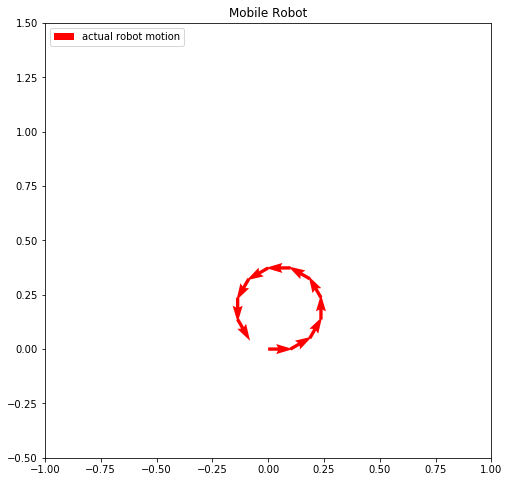

In [6]:
# タイトル付き新規ウィンドウ、座標軸を用意
fig = plt.figure(figsize=(8, 8))
plt.title("Mobile Robot")
world = fig.add_subplot(1,1,1)
world.set_xlim(-1.0,1.0)
world.set_ylim(-0.5,1.5)

history = [X0]
X = X0

for i in range(10):
    X = f(X, u)
    history.append(X)

print(history)

xs = [e[0] for e in history]
ys = [e[1] for e in history]
vxs = [math.cos(e[2]) for e in history]
vys = [math.sin(e[2]) for e in history]

world.quiver(xs,ys,vxs,vys,color="red",label="actual robot motion")

# 左上に凡例を追加
world.legend(loc='upper left')

# 現在の状態を確認
plt.show()